In [8]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import glob
import numpy as np

from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.descriptivestats import sign_test
from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import kurtosis
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy.stats import wilcoxon
from scipy.stats import iqr
from scipy.stats import spearmanr
from scipy import stats
from scipy.stats import ttest_rel

sns.set(style="darkgrid")


In [9]:
df = pd.read_excel('./Questionnaires.xlsx')

rmenA = df["RMenA"]
rfisA = df["RFisA"]
rtempA = df["RTemA"]
prestA = df["PrestA"]
sforzoA = df["SforzoA"]
frustrA = df["FrustrA"]

rmenB = df["RMenB"]
rfisB = df["RFisB"]
rtempB = df["RTemB"]
prestB = df["PrestB"]
sforzoB = df["SforzoB"]
frustrB = df["FrustrB"]

# median(IQR) for all questions for the two tasks
questionari = pd.DataFrame({
    "Question" : ["Mental Demand", "Physical demand", "Temporal demand", "Performance", "Effort", "Frustration"],
    "TaskA": [f"{np.median(rmenA)}({iqr(rmenA)})", f"{np.median(rfisA)}({iqr(rfisA)})", f"{np.median(rtempA)}({iqr(rtempA)})", f"{np.median(prestA)}({iqr(prestA)})", f"{np.median(sforzoA)}({iqr(sforzoA)})", f"{np.median(frustrA)}({iqr(frustrA)})"],
    "TaskB": [f"{np.median(rmenB)}({iqr(rmenB)})", f"{np.median(rfisB)}({iqr(rfisB)})", f"{np.median(rtempB)}({iqr(rtempB)})", f"{np.median(prestB)}({iqr(prestB)})", f"{np.median(sforzoB)}({iqr(sforzoB)})", f"{np.median(frustrB)}({iqr(frustrB)})"]
})

print(questionari)

          Question       TaskA       TaskB
0    Mental Demand   5.5(4.25)   4.5(5.25)
1  Physical demand  -6.5(6.25)  -6.0(5.75)
2  Temporal demand   -1.0(6.5)   -2.5(8.0)
3      Performance   -1.0(9.0)   -2.5(9.0)
4           Effort    6.0(4.5)    4.5(4.0)
5      Frustration  -5.0(9.25)   -6.0(8.5)


D'Agostino statistics=2.541, p=0.281
Shapiro-Wilk statistics=0.922, p=0.110
skewness=0.271
kurtosis=-1.130


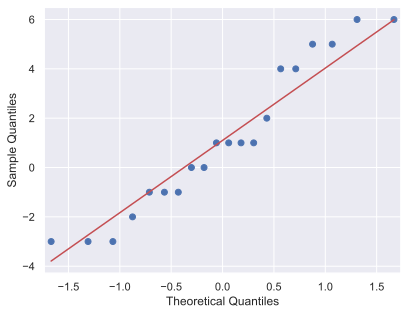

In [10]:
diff_rmen = rmenA - rmenB # mental demand

qqplot(diff_rmen, line='s')
# D'Agostino normality test
stat,p = normaltest(diff_rmen) 
print('D\'Agostino statistics=%.3f, p=%.3f' % (stat, p))
# Shapiro-Wilk normality test
stat, p = shapiro(diff_rmen) 
print('Shapiro-Wilk statistics=%.3f, p=%.3f' % (stat, p))

print('skewness=%.3f' % skew(diff_rmen))
print('kurtosis=%.3f' % kurtosis(diff_rmen))

In [11]:
statistic, pvalue = stats.wilcoxon(rmenA, rmenB)
print("Statistic:", statistic)
print("P value:", pvalue)

#Since the p-value (0.1602) is greater than 0.05, we cannot reject the null hypothesis.
#This means that there is not enough statistical evidence to say that the means of rmenA and rmenB are significantly different.
#In other words, the two conditions (rmenA and rmenB) are quite similar, considering the variability in the data.

Statistic: 53.5
P value: 0.1602277730964069


/Users/roc/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


D'Agostino statistics=6.327, p=0.042
Shapiro-Wilk statistics=0.832, p=0.003
skewness=-1.011
kurtosis=0.815


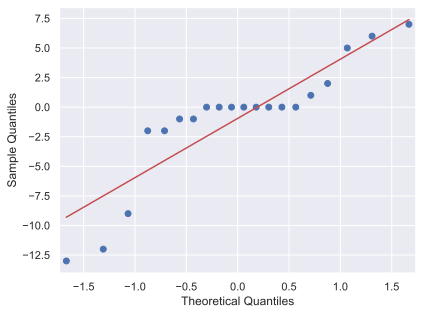

In [12]:
diff_rfis = rfisA - rfisB # physical demand

qqplot(diff_rfis, line='s')
# D'Agostino normality test
stat,p = normaltest(diff_rfis) 
print('D\'Agostino statistics=%.3f, p=%.3f' % (stat, p))
# Shapiro-Wilk normality test
stat, p = shapiro(diff_rfis) 
print('Shapiro-Wilk statistics=%.3f, p=%.3f' % (stat, p))

print('skewness=%.3f' % skew(diff_rfis))
print('kurtosis=%.3f' % kurtosis(diff_rfis))

In [13]:
# p < 0.05 -> wilcoxon
statistic, pvalue = stats.wilcoxon(rfisA, rfisB)
print("Statistic:", statistic)
print("P value:", pvalue)

#Since the p-value (0.5290) is greater than 0.05, we cannot reject the null hypothesis.
#This means that there is not enough statistical evidence to say that the means of rfisA and rfisB are significantly different.
#In other words, the two conditions (rfisA and rfisB) are quite similar, considering the variability in the data.

Statistic: 31.0
P value: 0.5290141897745606


/Users/roc/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


D'Agostino statistics=22.056, p=0.000
Shapiro-Wilk statistics=0.755, p=0.000
skewness=-1.702
kurtosis=5.868


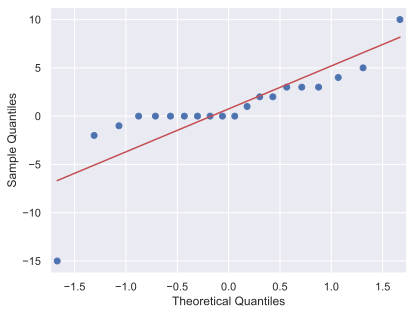

In [14]:
diff_rtemp = rtempA - rtempB # temporal demand

qqplot(diff_rtemp, line='s')
# D'Agostino normality test
stat,p = normaltest(diff_rtemp) 
print('D\'Agostino statistics=%.3f, p=%.3f' % (stat, p))
# Shapiro-Wilk normality test
stat, p = shapiro(diff_rtemp) 
print('Shapiro-Wilk statistics=%.3f, p=%.3f' % (stat, p))

print('skewness=%.3f' % skew(diff_rtemp))
print('kurtosis=%.3f' % kurtosis(diff_rtemp))

In [15]:
# p < 0.05 -> wilcoxon
statistic, pvalue = stats.wilcoxon(rtempA, rtempB)
print("Statistic:", statistic)
print("P value:", pvalue)

#Since the p-value (0.0906) is greater than 0.05, we cannot reject the null hypothesis.
#This means that there is not enough statistical evidence to say that the means of rtempA and rtempB are significantly different.
#In other words, the two conditions (rtempA and rtempB) are quite similar, considering the variability in the data.

Statistic: 17.5
P value: 0.090556875837822


/Users/roc/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


D'Agostino statistics=22.018, p=0.000
Shapiro-Wilk statistics=0.807, p=0.001
skewness=1.856
kurtosis=5.029


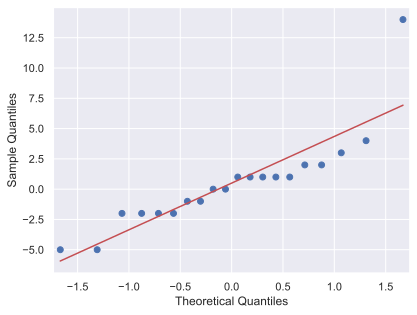

In [16]:
diff_prest = prestA - prestB # performance

qqplot(diff_prest, line='s')
# D'Agostino normality test
stat,p = normaltest(diff_prest) 
print('D\'Agostino statistics=%.3f, p=%.3f' % (stat, p))
# Shapiro-Wilk normality test
stat, p = shapiro(diff_prest) 
print('Shapiro-Wilk statistics=%.3f, p=%.3f' % (stat, p))

print('skewness=%.3f' % skew(diff_prest))
print('kurtosis=%.3f' % kurtosis(diff_prest))

In [17]:
# p < 0.05 -> wilcoxon
statistic, pvalue = stats.wilcoxon(prestA, prestB)
print("Statistic:", statistic)
print("P value:", pvalue)

#Since the p-value (0.9123) is greater than 0.05, we cannot reject the null hypothesis.
#This means that there is not enough statistical evidence to say that the means of prestA and prestB are significantly different.
#In other words, the two conditions (prestA and prestB) are quite similar, considering the variability in the data.

Statistic: 83.0
P value: 0.9123435233422943


/Users/roc/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


D'Agostino statistics=3.714, p=0.156
Shapiro-Wilk statistics=0.915, p=0.081
skewness=0.740
kurtosis=0.463


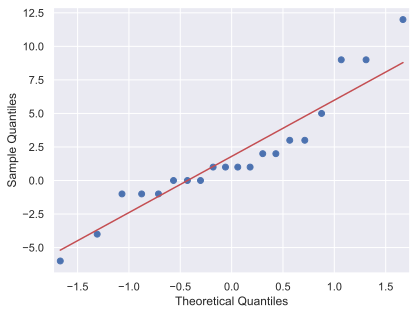

In [18]:
diff_sforzo = sforzoA - sforzoB # effort

qqplot(diff_sforzo, line='s')
# D'Agostino normality test
stat,p = normaltest(diff_sforzo) 
print('D\'Agostino statistics=%.3f, p=%.3f' % (stat, p))
# Shapiro-Wilk normality test
stat, p = shapiro(diff_sforzo) 
print('Shapiro-Wilk statistics=%.3f, p=%.3f' % (stat, p))

print('skewness=%.3f' % skew(diff_sforzo))
print('kurtosis=%.3f' % kurtosis(diff_sforzo))

In [19]:
statistic, pvalue = stats.wilcoxon(sforzoA, sforzoB)
print("Statistic:", statistic)
print("P value:", pvalue)

#Since the p-value (0.0661) is greater than 0.05, we cannot reject the null hypothesis.
#This means that there is not enough statistical evidence to say that the means of sforzoA and sforzoB are significantly different.
#In other words, the two conditions (sforzoA and sforzoB) are quite similar, considering the variability in the data.

Statistic: 38.0
P value: 0.06609683395962666


/Users/roc/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


D'Agostino statistics=3.949, p=0.139
Shapiro-Wilk statistics=0.907, p=0.056
skewness=-0.806
kurtosis=0.373


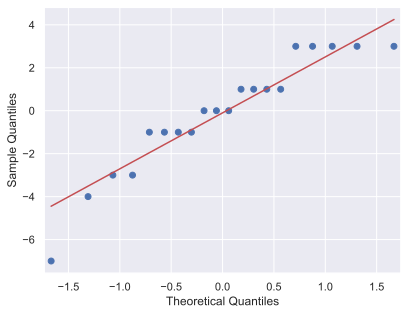

In [20]:
diff_frustr = frustrA - frustrB # frustration

qqplot(diff_frustr, line='s')
# D'Agostino normality test
stat,p = normaltest(diff_frustr) 
print('D\'Agostino statistics=%.3f, p=%.3f' % (stat, p))
# Shapiro-Wilk normality test
stat, p = shapiro(diff_frustr) 
print('Shapiro-Wilk statistics=%.3f, p=%.3f' % (stat, p))

print('skewness=%.3f' % skew(diff_frustr))
print('kurtosis=%.3f' % kurtosis(diff_frustr))

In [21]:
statistic, pvalue = stats.wilcoxon(frustrA, frustrB)
print("Statistic:", statistic)
print("P value:", pvalue)

#Since the p-value (0.9423) is greater than 0.05, we cannot reject the null hypothesis.
#This means that there is not enough statistical evidence to say that the means of frustrA and frustrB are significantly different.
#In other words, the two conditions (frustrA and frustrB) are quite similar, considering the variability in the data.

Statistic: 75.0
P value: 0.9422503259297406


/Users/roc/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Comments
Task A
- Difficile perché ci si concentrava più sulla direzione che sulla velocità o viceversa (3 partecipanti)
- Difficile, una volta fatte le proporzioni per la direzione, azzeccare la velocità siccome erano già state impostate le componenti
- 40 trial sono tanti, ad un certo punto subentra la distrazione (2 partecipanti)
- Usare 40 tentativi per calibrarsi, si migliorava con i tentativi (3 partecipanti)
- Sbagliare quadrante perché concentrazione su direzione e non su pitch (2 partecipanti)
- Difficile azzeccare la velocità (2 partecipanti)
- Utile usare le proporzioni per la direzione (come vettori) (4 partecipanti)
- Utile usare i rapporti tra i battiti per tradurli in rapporto tra le componenti
- Analizzate velocità e direzione come componenti distinte come su piano cartesiano
- Velocità fatta a sentimento
- Confusione sul pitch quando cambiava suono da un tentativo all'altro
- Più i ritmi erano sostenuti più era facile
- L'attività mentale diminuisce durante i 40 tentativi
- Difficile stimare l’angolo soprattutto vicino ai 45 gradi
- I ritmi sostenuti sono pressanti e frustranti

Task B
- Si migliora durante l'esperimento (4 partecipanti)
- Difficile mantenere le velocità lente
- Difficile concentrarsi sia su direzione che velocità (2 partecipanti)
- Subentra distrazione
- Velocità molto difficile
- Tenere il ritmo aiuta ad andare bene anche con la velocità (contare nel premere i tasti) (2 partecipanti)
- Più difficile del primo (3 partecipanti)
- Frustrante e difficile essere precisi
- No attenzione al feedback sonoro
- Un utente prende spunto dal task A dopo i primi 25 tentativi
- Un utente dice di non essere riuscito a farsi uno schema mentale del funzionamento

### Opinions
- Buono il training per familiarizzare
- Scomodo lo stilo
- Un utente consiglia di mettere nella fase di training la possibilità di poter sperimentare singolarmente le componenti orizzontali e verticali, e di inserire la possibilità di capire qual è la velocità massima e quale quella minima
